## Adaline

In [24]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [25]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.04689569, -0.00928877,  1.00192634,  1.00272922,  0.00978646],
        [-0.04516816,  1.04693615, -0.00763254,  1.04275373, -0.01721427]]),
 array([[-1, -1, -1,  1, -1]]))

In [26]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [27]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

In [28]:
perceptrons = []
for allowed_err in list(np.linspace(0.1, 2, num=300)):
    p = Adaline(x_train, d_train, x_test, d_test, 0.0001, allowed_err, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

300

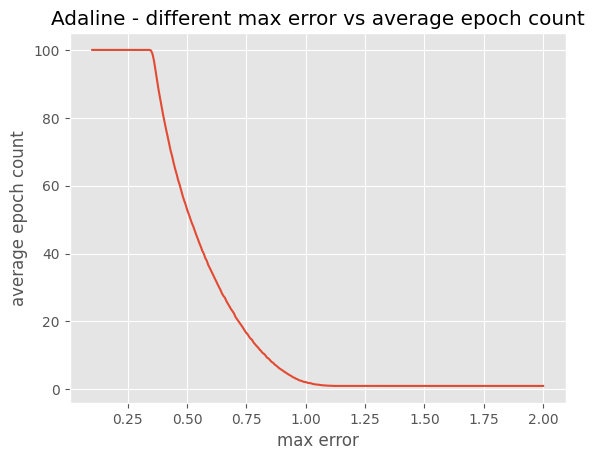

In [31]:
# plt.gcf().set_size_inches(8, 4)
x, y = [x.allowed_error for x in perceptrons], [x.average_epoch_count for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different max error vs average epoch count")
plt.xlabel("max error")
plt.ylabel("average epoch count")
pd.DataFrame({"max error":x, "epoch count":y});

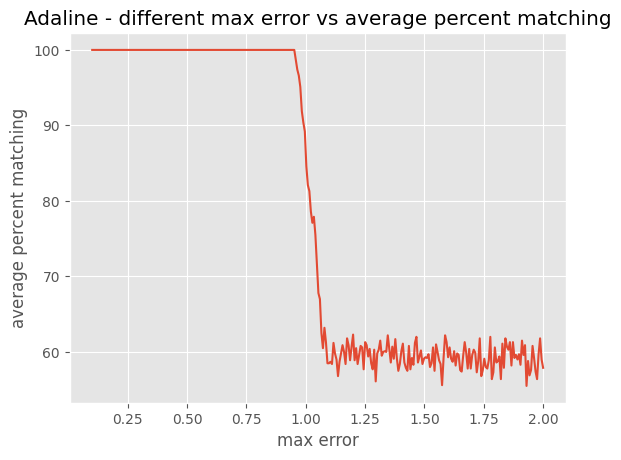

In [32]:
# plt.gcf().set_size_inches(8, 4)
x, y = [x.allowed_error for x in perceptrons], [x.average_matching_percent for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different max error vs average percent matching")
plt.xlabel("max error")
plt.ylabel("average percent matching");

Stopień dopasowania w zależności od wartości maksemalnej błędu (𝛿). Możemy zobaczyć, że przy zbyt dużej
wartości błędu kwadratowego średnia wartość dopasowania jest około 60% - czyli w przybliżeniu losowe.
Co ciekawe między wartościami 0.9 a 1.1 stopień dopasowania drastycznie spada.
!!! dla innej wielkości zbioru uczącego